In [ ]:
# https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/?utm_source=blog&utm_medium=computer-vision-implementing-mask-r-cnn-image-segmentation

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import cv2
from PIL import Image

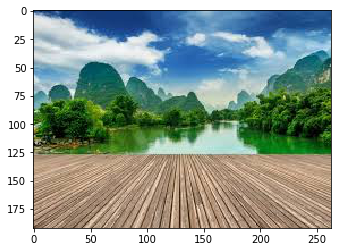

In [2]:
image = plt.imread('1.jpeg')
image.shape
plt.imshow(image)

In [20]:
image_1 = cv2.imread("INVOICE1.jpg") ## Loading image directly as black & white.
(H, W, C) = image_1.shape # H = no. of rows, W = no. of columns
print("width/columns = {}, height/rows = {}".format(W, H))
# Display in original size 
image_pil_1 = Image.fromarray(image_1[0:500, 1250:]) 
#display(image_pil_1) 
 
image_pil_1.save('invoice_img.jpg')

width/columns = 2528, height/rows = 3504


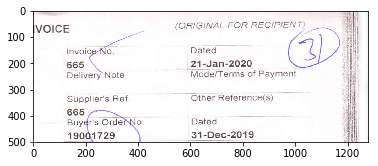

In [3]:
image_inv = plt.imread('invoice_img.jpg')
image_inv.shape
plt.imshow(image_inv)

In [4]:
image

array([[[ 27,  64, 116],
        [ 55,  92, 144],
        [ 64, 101, 153],
        ...,
        [ 42,  92, 151],
        [ 42,  92, 151],
        [ 42,  92, 151]],

       [[ 40,  74, 120],
        [ 32,  69, 114],
        [ 40,  76, 124],
        ...,
        [ 39,  89, 148],
        [ 39,  89, 148],
        [ 38,  88, 147]],

       [[132, 161, 201],
        [ 94, 126, 165],
        [ 71, 103, 144],
        ...,
        [ 36,  86, 145],
        [ 34,  84, 143],
        [ 33,  83, 142]],

       ...,

       [[173, 146, 125],
        [171, 144, 123],
        [122,  95,  74],
        ...,
        [182, 160, 136],
        [161, 139, 115],
        [159, 137, 113]],

       [[149, 122, 101],
        [ 93,  66,  45],
        [ 96,  69,  48],
        ...,
        [205, 184, 157],
        [190, 169, 142],
        [183, 162, 135]],

       [[102,  75,  54],
        [ 95,  68,  47],
        [106,  79,  58],
        ...,
        [120,  99,  72],
        [153, 132, 105],
        [180, 159, 132]]

In [11]:
image_inv

array([[[237, 221, 224],
        [237, 221, 224],
        [238, 222, 225],
        ...,
        [225, 231, 231],
        [225, 231, 231],
        [222, 231, 230]],

       [[238, 222, 225],
        [238, 222, 225],
        [238, 222, 225],
        ...,
        [226, 232, 232],
        [225, 231, 231],
        [223, 232, 231]],

       [[238, 222, 225],
        [239, 223, 226],
        [239, 223, 226],
        ...,
        [227, 233, 233],
        [226, 232, 232],
        [224, 233, 232]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [245, 245, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [245, 245, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [245, 245, 245]]

In [10]:
image_inv.min()

26

In [12]:
image_inv.max()

255

(192, 263)


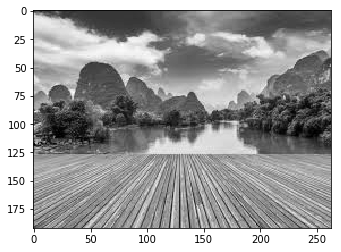

In [35]:
## Converting to grey scale
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')
print(gray.shape)

In [6]:
gray = rgb2gray(image)
gray_inv = rgb2gray(image_inv)

print('gray shape = ', gray.shape)
print('gray_inv shape = ', gray_inv.shape)

gray shape =  (192, 263)
gray_inv shape =  (500, 1278)


In [7]:
gray

array([[0.2348498 , 0.34465373, 0.37994784, ..., 0.33579961, 0.33579961,
        0.33579961],
       [0.27486902, 0.25247843, 0.28161098, ..., 0.3240349 , 0.3240349 ,
        0.32011333],
       [0.61851569, 0.47847804, 0.38884745, ..., 0.3122702 , 0.30442706,
        0.30050549],
       ...,
       [0.58911137, 0.58126824, 0.38911137, ..., 0.63899843, 0.55664549,
        0.54880235],
       [0.49499373, 0.27538588, 0.28715059, ..., 0.73143451, 0.67261098,
        0.64516   ],
       [0.31068   , 0.28322902, 0.32636627, ..., 0.39810118, 0.52751294,
        0.63339529]])

In [8]:
gray_inv

array([[0.88084824, 0.88084824, 0.8847698 , ..., 0.90088235, 0.90088235,
        0.89809961],
       [0.8847698 , 0.8847698 , 0.8847698 , ..., 0.90480392, 0.90088235,
        0.90202118],
       [0.8847698 , 0.88869137, 0.88869137, ..., 0.90872549, 0.90480392,
        0.90594275],
       ...,
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96470588,
        0.96078431],
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96470588,
        0.96078431],
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.96470588,
        0.96078431]])

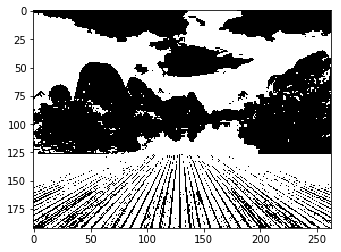

In [13]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

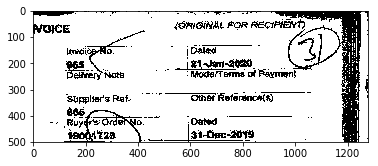

In [14]:
gray_inv_r = gray_inv.reshape(gray_inv.shape[0]*gray_inv.shape[1])
mean_pixel =  gray_inv_r.mean()
for i in range(gray_inv_r.shape[0]):
    if gray_inv_r[i] > mean_pixel:
        gray_inv_r[i] = 1
    else:
        gray_inv_r[i] = 0
gray_inv = gray_inv_r.reshape(gray_inv.shape[0],gray_inv.shape[1])
plt.imshow(gray_inv, cmap='gray')

In [15]:
print(gray_r.mean())
print(gray_inv_r.mean())

0.5376069391634981
0.8304115805946792


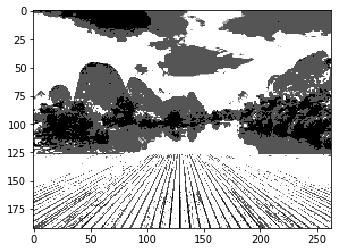

In [16]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
mean_px = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > mean_px:
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

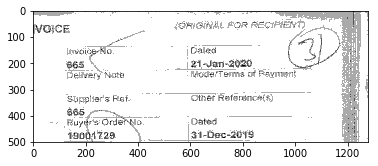

In [17]:
gray_inv = rgb2gray(image_inv)
gray_inv_r = gray_inv.reshape(gray_inv.shape[0]*gray_inv.shape[1])
mean_pixel =  gray_inv_r.mean()
for i in range(gray_inv_r.shape[0]):
    if gray_inv_r[i] > mean_pixel:
        gray_inv_r[i] = 3
    elif gray_inv_r[i] > 0.5:
        gray_inv_r[i] = 2
    elif gray_inv_r[i] > 0.25:
        gray_inv_r[i] = 1
    else:
        gray_inv_r[i] = 0
gray_inv = gray_inv_r.reshape(gray_inv.shape[0],gray_inv.shape[1])
plt.imshow(gray_inv, cmap='gray')

In [18]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


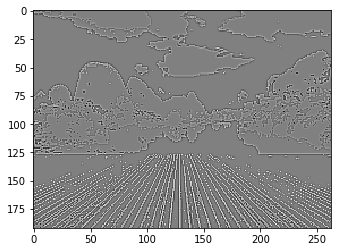

In [19]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
## This edge detection is after above segmentation

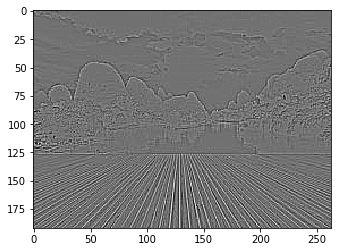

In [24]:
gray = rgb2gray(image)
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
## This edge detection is before edge segmentation

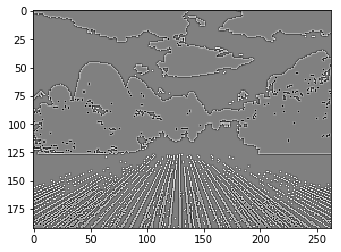

In [25]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
## This edge detection is after 1st edge segmentation

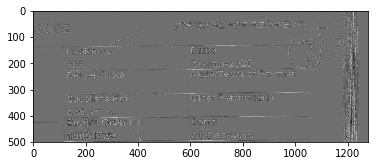

In [22]:
gray_inv = rgb2gray(image_inv)
out_l = ndimage.convolve(gray_inv, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
## This edge detection is before edge segmentation

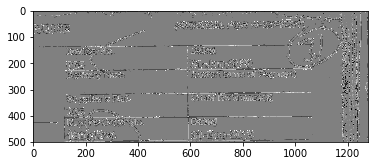

In [23]:
gray_inv_r = gray_inv.reshape(gray_inv.shape[0]*gray_inv.shape[1])
mean_pixel =  gray_inv_r.mean()
for i in range(gray_inv_r.shape[0]):
    if gray_inv_r[i] > mean_pixel:
        gray_inv_r[i] = 1
    else:
        gray_inv_r[i] = 0
gray_inv = gray_inv_r.reshape(gray_inv.shape[0],gray_inv.shape[1])
out_l = ndimage.convolve(gray_inv, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
## This edge detection is after 1st edge segmentation

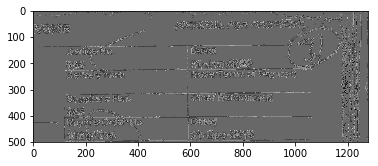

In [26]:
gray_inv = rgb2gray(image_inv)
gray_inv_r = gray_inv.reshape(gray_inv.shape[0]*gray_inv.shape[1])
mean_pixel =  gray_inv_r.mean()
for i in range(gray_inv_r.shape[0]):
    if gray_inv_r[i] > mean_pixel:
        gray_inv_r[i] = 3
    elif gray_inv_r[i] > 0.5:
        gray_inv_r[i] = 2
    elif gray_inv_r[i] > 0.25:
        gray_inv_r[i] = 1
    else:
        gray_inv_r[i] = 0
gray_inv = gray_inv_r.reshape(gray_inv.shape[0],gray_inv.shape[1])
out_l = ndimage.convolve(gray_inv, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
